In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv("./Desktop/DATA ANALYSIS PROJECT/DataCampPro/stack_overflow_data.csv")

In [38]:
df.shape

(420066, 4)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420066 entries, 0 to 420065
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   year           420066 non-null  int64 
 1   tag            420040 non-null  object
 2   num_questions  420066 non-null  int64 
 3   year_total     420066 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 12.8+ MB


In [32]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,420066.0,NaN,NaN,NaN,2015.132601,3.411208,2008.0,2012.0,2015.0,2018.0,2020.0
tag,420040,59643,treeview,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_questions,420066.0,NaN,NaN,NaN,142.557336,2355.220337,1.0,2.0,7.0,29.0,264379.0
year_total,420066.0,NaN,NaN,NaN,5222995.102446,1679353.298187,168541.0,4787010.0,5621997.0,6431458.0,6612772.0


In [34]:
df.columns

Index(['year', 'tag', 'num_questions', 'year_total'], dtype='object')

In [36]:
df.count()

year             420066
tag              420040
num_questions    420066
year_total       420066
dtype: int64

In [46]:
#Add a new columns percentage
df["percentage"] = 100 * (df["num_questions"]/df["year_total"])

In [50]:
r_over_time = df[df["tag"]=="r"]

In [52]:
r_over_time

,year,tag,num_questions,year_total,percentage
5804,2008,r,8,168541,0.004747
17549,2009,r,523,981124,0.053306
34437,2010,r,2264,1970729,0.114881
57694,2011,r,5835,3473395,0.167991
92173,2012,r,12183,4787010,0.254501
123600,2013,r,22256,6037170,0.368650
158004,2014,r,30923,6431458,0.480809
194451,2015,r,40704,6612772,0.615536
234103,2016,r,44365,6593600,0.672849
274153,2017,r,51061,6342517,0.805059


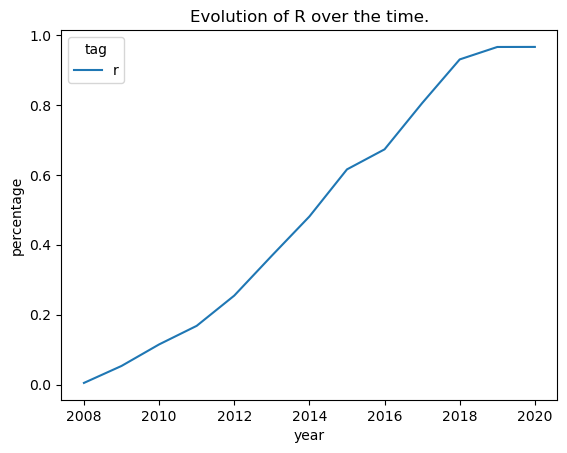

In [64]:
sns.lineplot(data = r_over_time, x = "year", y = "percentage", hue = "tag")
plt.title("Evolution of R over the time.")
plt.savefig("./Desktop/DATA ANALYSIS PROJECT/PYTHON/Image/R over the time.png")

In [78]:
#Pyton and css over the time
py_over_time = df[(df["tag"]=="python")]

In [80]:
py_over_time

,year,tag,num_questions,year_total,percentage
723,2008,python,2069,168541,1.227594
18212,2009,python,12874,981124,1.312168
39380,2010,python,27029,1970729,1.371523
51261,2011,python,42169,3473395,1.214057
86787,2012,python,64254,4787010,1.342257
116813,2013,python,96527,6037170,1.598878
149331,2014,python,116568,6431458,1.812466
185383,2015,python,137353,6612772,2.077087
224846,2016,python,158624,6593600,2.405727
265619,2017,python,192229,6342517,3.030800


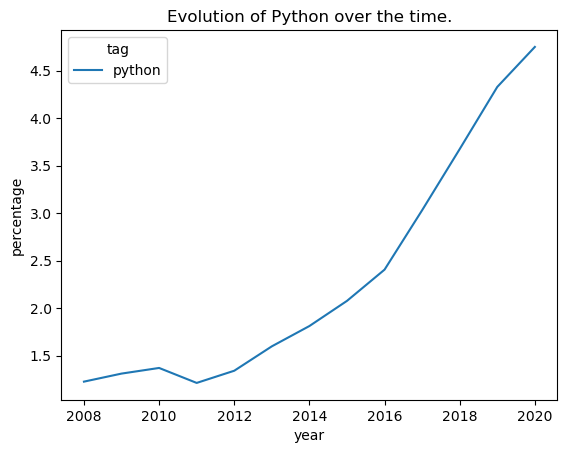

In [82]:
sns.lineplot(data = py_over_time, x = "year", y = "percentage", hue = "tag")
plt.title("Evolution of Python over the time.")
plt.savefig("./Desktop/DATA ANALYSIS PROJECT/PYTHON/Image/Python over the time.png")

In [89]:
css_over_time = df[(df["tag"]=="css")]

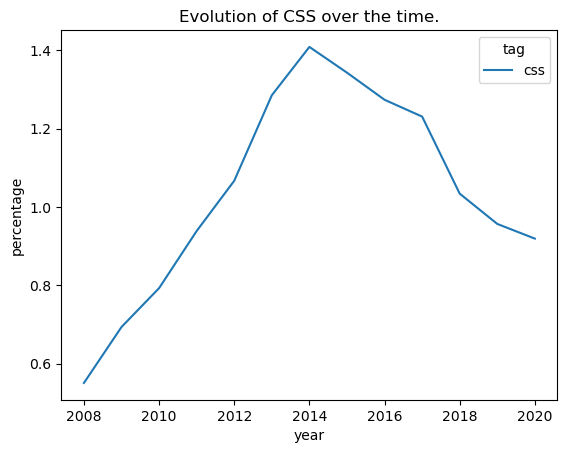

In [91]:
sns.lineplot(data = css_over_time, x = "year", y = "percentage", hue = "tag")
plt.title("Evolution of CSS over the time.")
plt.savefig("./Desktop/DATA ANALYSIS PROJECT/PYTHON/Image/CSS over the time.png")

In [101]:
js_over_time =df[df["tag"]=="javascript"]
js_over_time

,year,tag,num_questions,year_total,percentage
5049,2008,javascript,2734,168541,1.622157
17391,2009,javascript,18723,981124,1.908321
40077,2010,javascript,43430,1970729,2.203753
52472,2011,javascript,89960,3473395,2.589973
88026,2012,javascript,136276,4787010,2.846787
117597,2013,javascript,196047,6037170,3.247333
151221,2014,javascript,236386,6431458,3.675465
187104,2015,javascript,256039,6612772,3.871886
226877,2016,javascript,264379,6593600,4.009631
267015,2017,javascript,250268,6342517,3.945878


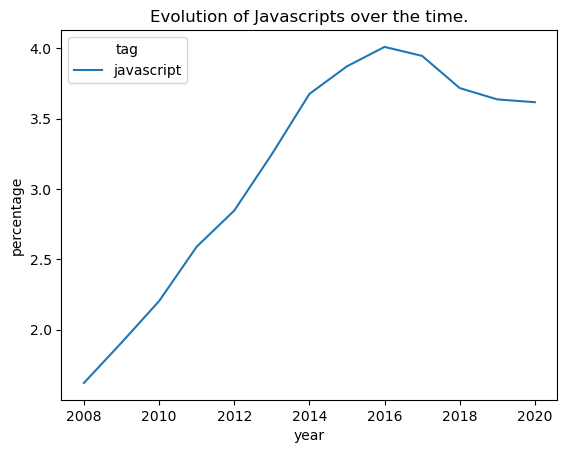

In [103]:
sns.lineplot(data = js_over_time, x = "year", y = "percentage", hue = "tag")
plt.title("Evolution of Javascripts over the time.")
plt.savefig("./Desktop/DATA ANALYSIS PROJECT/PYTHON/Image/js over the time.png")

In [109]:
java_over_time = df[df["tag"]=="java"]

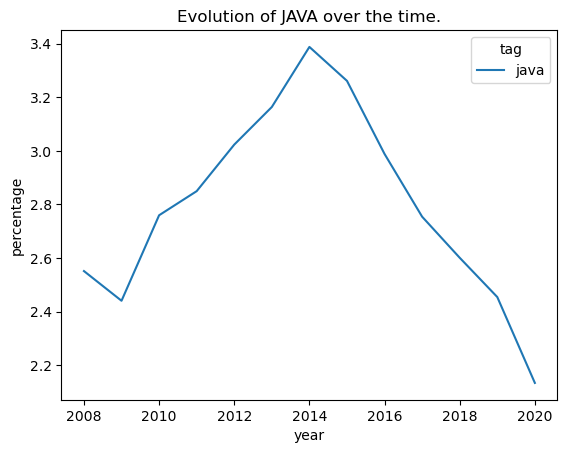

In [111]:
sns.lineplot(data = java_over_time, x = "year", y = "percentage", hue = "tag")
plt.title("Evolution of JAVA over the time.")
plt.savefig("./Desktop/DATA ANALYSIS PROJECT/PYTHON/Image/JAVA over the time.png")

In [219]:
df["tag_total"] = df["num_questions"].sum()

In [226]:
sorted_vals

tag
.a                  359300940
.app                359300940
.aspxauth           359300940
.bash-profile       179650470
.class-file         359300940
                      ...    
zxingobjc            59883490
zxspectrum          239533960
zynq                359300940
zynq-ultrascale+    119766980
zypper              359300940
Name: tag_total, Length: 57209, dtype: int64

In [181]:
sorted_vals

,year,num_questions,year_total,percentage
tag,,,,
zypper,12105,34,36034063,0.000564
zynq-ultrascale+,4039,8,10863177,0.000147
zynq,12105,214,36034063,0.003544
zxspectrum,8067,7,24959521,0.000117
zxingobjc,2017,2,6342517,0.000032
...,...,...,...,...
.class-file,12105,120,36034063,0.001972
.bash-profile,6048,250,19548889,0.003818
.aspxauth,12105,19,36034063,0.000313


## ML

In [124]:
x = df[["num_questions","year_total","percentage"]]
y = df["num_questions"]

In [126]:
x

,num_questions,year_total,percentage
0,69,168541,0.040940
1,30,168541,0.017800
2,21,168541,0.012460
3,35,168541,0.020766
4,6,168541,0.003560
...,...,...,...
420061,4,5452545,0.000073
420062,1,5452545,0.000018
420063,2,5452545,0.000037
420064,1,5452545,0.000018


In [133]:
model = LinearRegression()

In [135]:
model.fit(x,y)

LinearRegression()

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=45, test_size=.5)

In [149]:
x_train

,num_questions,year_total,percentage
205917,2,6612772,0.000030
416128,1,5452545,0.000018
226732,28,6593600,0.000425
61686,58,3473395,0.001670
312000,1,5621997,0.000018
...,...,...,...
81853,1,4787010,0.000021
406111,2,5452545,0.000037
323104,10,5621997,0.000178
399228,1,5452545,0.000018


In [151]:
x_test

,num_questions,year_total,percentage
11495,1,981124,0.000102
380408,1,5452545,0.000018
100766,28,4787010,0.000585
183930,56,6612772,0.000847
4536,2,168541,0.001187
...,...,...,...
12823,1,981124,0.000102
42462,32,1970729,0.001624
37579,144,1970729,0.007307
276061,2,6342517,0.000032


In [153]:
y_test

11495       1
380408      1
100766     28
183930     56
4536        2
         ... 
12823       1
42462      32
37579     144
276061      2
95685       9
Name: num_questions, Length: 210033, dtype: int64

In [155]:
y_train

205917     2
416128     1
226732    28
61686     58
312000     1
          ..
81853      1
406111     2
323104    10
399228     1
399774     1
Name: num_questions, Length: 210033, dtype: int64

In [237]:
#Fit x_tarin and x_test
model.fit(x_test, x_train)

LinearRegression()

In [243]:
x_train

,num_questions,year_total,percentage
205917,2,6612772,0.000030
416128,1,5452545,0.000018
226732,28,6593600,0.000425
61686,58,3473395,0.001670
312000,1,5621997,0.000018
...,...,...,...
81853,1,4787010,0.000021
406111,2,5452545,0.000037
323104,10,5621997,0.000178
399228,1,5452545,0.000018


In [247]:
y_pred = model.predict(x_train)

In [249]:
y_pred

array([[1.32670397e+02, 5.22143726e+06, 2.85361359e-03],
       [1.40058206e+02, 5.22176965e+06, 3.04106436e-03],
       [1.32771937e+02, 5.22148994e+06, 2.85610933e-03],
       ...,
       [1.38969704e+02, 5.22173684e+06, 3.01346723e-03],
       [1.40058206e+02, 5.22176965e+06, 3.04106436e-03],
       [1.40058206e+02, 5.22176965e+06, 3.04106436e-03]])

<Axes: >

C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


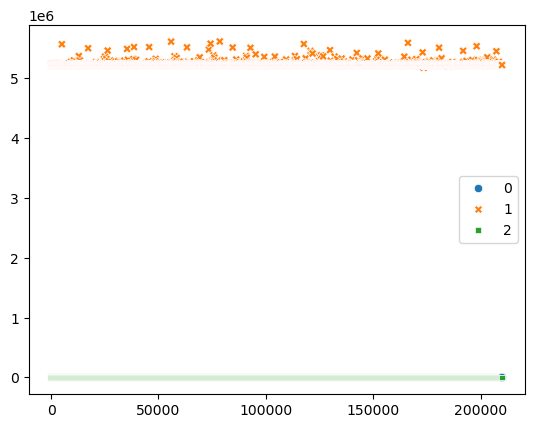

In [259]:
sns.scatterplot(y_pred)

<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</a></li>
</h2>
